# 1. Install Dependencies and Setup

In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
# !pip list

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\aksha\AppData\Local\Temp\ipykernel_29612\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

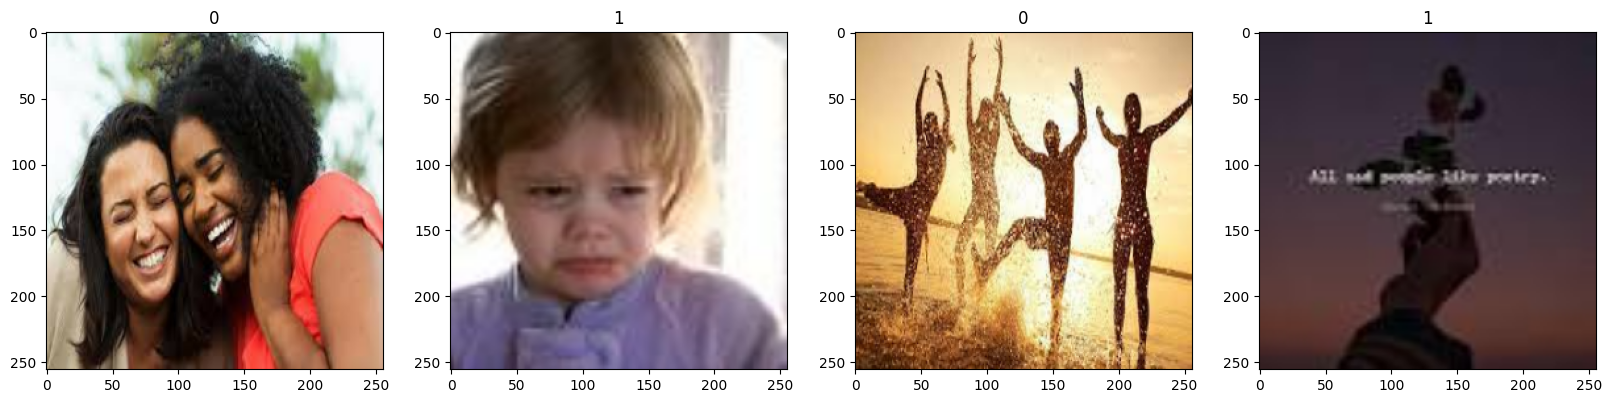

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          ...,
          [0.3275429 , 0.3275429 , 0.3275429 ],
          [0.32907474, 0.32907474, 0.32907474],
          [0.32941177, 0.32941177, 0.32941177]],
 
         [[0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          ...,
          [0.3275429 , 0.3275429 , 0.3275429 ],
          [0.32907474, 0.32907474, 0.32907474],
          [0.32941177, 0.32941177, 0.32941177]],
 
         [[0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          [0.21960784, 0.21960784, 0.21960784],
          ...,
          [0.3275429 , 0.3275429 , 0.3275429 ],
          [0.32907474, 0.32907474, 0.32907474],
          [0.32941177, 0.32941177, 0.32941177]],
 
         ...,
 
         [[0.12156863, 0.12156863, 0.12156863],
          [0.12156

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6. Build Deep Learning Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
# model.summary()

# logdir='logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val) #, callbacks=[tensorboard_callback])

Epoch 1/20


c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.5241 - loss: 1.8588 - val_accuracy: 0.5156 - val_loss: 0.6628
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.5204 - loss: 0.6833 - val_accuracy: 0.5781 - val_loss: 0.6691
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.5208 - loss: 0.6767 - val_accuracy: 0.5469 - val_loss: 0.6559
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.5976 - loss: 0.6365 - val_accuracy: 0.7344 - val_loss: 0.5429
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.6827 - loss: 0.5806 - val_accuracy: 0.7344 - val_loss: 0.5336
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.8169 - loss: 0.4920 - val_accuracy: 0.8594 - val_loss: 0.3741
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.7848 - loss: 0.5407 - val_accuracy: 0.8125 - val_loss: 0.4842
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.8503 - loss: 0.4764 - val_accuracy: 0.8125 - val_loss: 0.4165
Epo

# 7. Train

# 8. Plot Performance

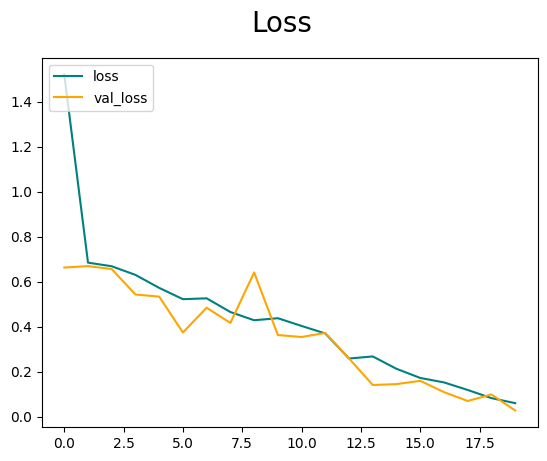

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

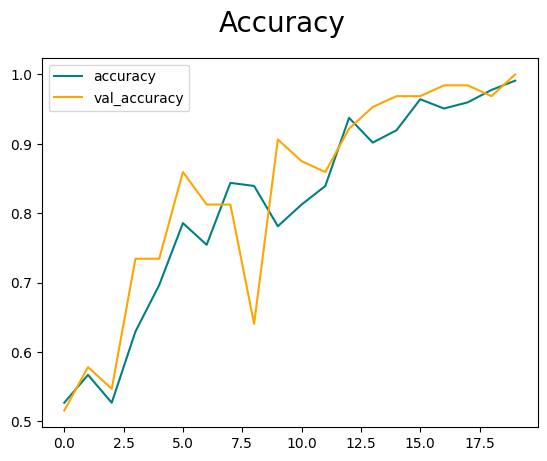

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [29]:
import cv2

TypeError: Image data of dtype object cannot be converted to float

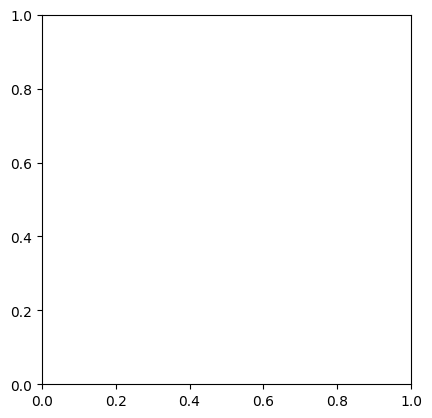

In [30]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

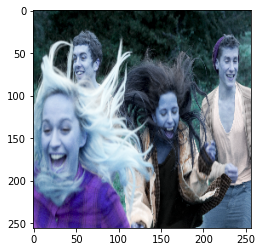

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.01972741]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)